## $\displaystyle\mathrm{Al_{x}Ga_{1-x}As/GaAs/Al_{x}Ga_{1-x}As}$ Structure


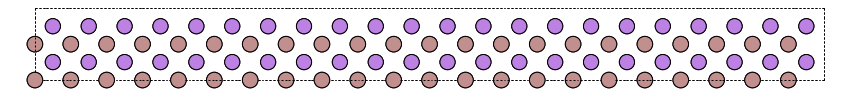

In [23]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
import ase.spacegroup
from ase.spacegroup import crystal
from ase.visualize import view
from ase.io.cif import read_cif
from ase.io.xyz import write_xyz
from ase.io import read, write
from ase.io.xsf import read_xsf, write_xsf
from ase.build import make_supercell, bulk
import numpy as np
from ase import Atoms
from ase.lattice import *
from ase.dft.kpoints import *
from ase.optimize import BFGS,LBFGS
from gpaw import GPAW, PW, FermiDirac 
from ase.constraints import ExpCellFilter

plt.rcParams['axes.facecolor']= 'none'
plt.rcParams['figure.facecolor'] = 'none'

a = 5.628  # Lattice parameter
GaAs = crystal(['Ga','As'],
                basis=[(0,0,0),(0.25,0.25,0.25)], 
                spacegroup=216,
                cellpar=[a,a,a,90,90,90]
              )
bp = GaAs.cell.bandpath()
path = GaAs.cell.bandpath()
atoms =GaAs
atoms.pbc = (False, False, True)
#atoms.center(vacuum=1.0, axis=2)
atoms *=(2,1,11)
plt.figure(figsize=(15,10))
ax0 = plot_atoms(atoms,
           radii=0.5,
           rotation='0x,90y,0z',
            )
ax0.set_axis_off()

In [20]:
for atom in atoms[::5]:
    print(atom)

Atom('Ga', [0.0, 0.0, 0.0], index=0)
Atom('As', [4.221, 4.221, 1.407], index=1)
Atom('Ga', [2.814, 0.0, 8.442], index=2)
Atom('As', [1.407, 4.221, 9.849], index=3)
Atom('As', [1.407, 1.407, 12.663], index=4)
Atom('Ga', [0.0, 2.814, 19.698], index=5)
Atom('As', [4.221, 1.407, 21.105], index=6)
Atom('Ga', [2.814, 2.814, 22.512], index=7)
Atom('Ga', [0.0, 0.0, 28.14], index=8)
Atom('As', [4.221, 4.221, 29.547], index=9)
Atom('Ga', [2.814, 0.0, 36.582], index=10)
Atom('As', [1.407, 4.221, 37.989000000000004], index=11)
Atom('As', [1.407, 1.407, 40.803], index=12)
Atom('Ga', [0.0, 2.814, 47.838], index=13)
Atom('As', [4.221, 1.407, 49.245000000000005], index=14)
Atom('Ga', [2.814, 2.814, 50.652], index=15)
Atom('Ga', [5.628, 0.0, 0.0], index=16)
Atom('As', [9.849, 4.221, 1.407], index=17)
Atom('Ga', [8.442, 0.0, 8.442], index=18)
Atom('As', [7.035, 4.221, 9.849], index=19)
Atom('As', [7.035, 1.407, 12.663], index=20)
Atom('Ga', [5.628, 2.814, 19.698], index=21)
Atom('As', [9.849, 1.407, 21.

In [24]:
view(atoms)

<Popen: returncode: None args: ['/home/ruco/anaconda3/envs/ase/bin/python', ...>

Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/ruco/anaconda3/envs/ase/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/home/ruco/anaconda3/envs/ase/lib/python3.9/site-packages/ase/gui/celleditor.py", line 75, in apply_center
    self.gui.new_atoms(atoms)
  File "/home/ruco/anaconda3/envs/ase/lib/python3.9/site-packages/ase/gui/gui.py", line 364, in new_atoms
    self.notify_vulnerable()
  File "/home/ruco/anaconda3/envs/ase/lib/python3.9/site-packages/ase/gui/gui.py", line 377, in notify_vulnerable
    ref.notify_atoms_changed()
  File "/home/ruco/anaconda3/envs/ase/lib/python3.9/site-packages/ase/gui/celleditor.py", line 149, in notify_atoms_changed
    self.update(atoms.cell, atoms.pbc)
  File "/home/ruco/anaconda3/envs/ase/lib/python3.9/site-packages/ase/gui/celleditor.py", line 160, in update
    self.cell_grid[i][j].value = cell[i][j]
  File "/home/ruco/anaconda3/envs/ase/lib/python3.9/site-packages/as

In [ ]:
!pwd

In [ ]:
!ls ../symmetry/*

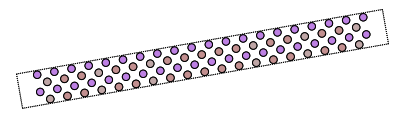

In [6]:
algaas = read('../symmetry/AlGaAs01.cif')
plt.figure(figsize=(7,5))
ax0 = plot_atoms(algaas,
           radii=0.5,
           rotation='0x,90y,10z',
            )
ax0.set_axis_off()

In [7]:
view(algaas)

<Popen: returncode: None args: ['/home/ruco/anaconda3/envs/ase/bin/python', ...>

In [11]:
from ase.spacegroup.symmetrize import check_symmetry
check_symmetry(algaas)

{'number': 115,
 'hall_number': 392,
 'international': 'P-4m2',
 'hall': 'P -4 -2',
 'choice': '',
 'transformation_matrix': array([[ 2.,  1.,  0.],
        [-2.,  1.,  0.],
        [ 0.,  0.,  1.]]),
 'origin_shift': array([0.25, 0.5 , 0.  ]),
 'rotations': array([[[ 1,  0,  0],
         [ 0,  1,  0],
         [ 0,  0,  1]],
 
        [[-1,  0,  0],
         [ 0, -1,  0],
         [ 0,  0,  1]],
 
        [[ 1,  0,  0],
         [ 0, -1,  0],
         [ 0,  0, -1]],
 
        [[-1,  0,  0],
         [ 0,  1,  0],
         [ 0,  0, -1]],
 
        [[ 1,  0,  0],
         [ 0,  1,  0],
         [ 0,  0,  1]],
 
        [[-1,  0,  0],
         [ 0, -1,  0],
         [ 0,  0,  1]],
 
        [[ 1,  0,  0],
         [ 0, -1,  0],
         [ 0,  0, -1]],
 
        [[-1,  0,  0],
         [ 0,  1,  0],
         [ 0,  0, -1]],
 
        [[ 1,  0,  0],
         [ 0,  1,  0],
         [ 0,  0,  1]],
 
        [[-1,  0,  0],
         [ 0, -1,  0],
         [ 0,  0,  1]],
 
        [[ 1,  0,  0],

## $\displaystyle\mathrm{Al_{x}Ga_{1-x}As/GaAs/Al_{x}Ga_{1-x}As/GaAs/Al_{x}Ga_{1-x}As}$ Structure


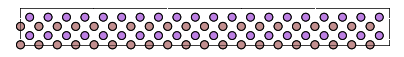

In [3]:

a = 5.628  # Lattice parameter
GaAs = crystal(['Ga','As'],
                basis=[(0,0,0),(0.25,0.25,0.25)], 
                spacegroup=216,
                cellpar=[a,a,a,90,90,90]
              )
bp = GaAs.cell.bandpath()
path = GaAs.cell.bandpath()
atoms =GaAs
atoms.pbc = (False, False, True)
#atoms.center(vacuum=1.0, axis=2)
atoms *=(2,1,10)
plt.figure(figsize=(7,5))
ax0 = plot_atoms(atoms,
           radii=0.5,
           rotation='0x,90y,0z',
            )
ax0.set_axis_off()

In [ ]:
!ls ../symmetry/*.cif

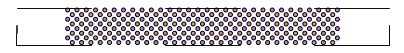

In [14]:
algaas2 = read('../symmetry/AlGaAs05.cif')
plt.figure(figsize=(7,7))
ax0 = plot_atoms(algaas2,
           radii=0.5,
           rotation='90x,0y,90z',
            )
ax0.set_axis_off()

In [5]:
view(algaas2)

<Popen: returncode: None args: ['/home/ruco/anaconda3/envs/ase/bin/python', ...>

In [15]:
from ase.spacegroup.symmetrize import check_symmetry
check_symmetry(algaas2)

{'number': 25,
 'hall_number': 125,
 'international': 'Pmm2',
 'hall': 'P 2 -2',
 'choice': '',
 'transformation_matrix': array([[-2., -1.,  0.],
        [-2.,  1.,  0.],
        [ 0.,  0., -1.]]),
 'origin_shift': array([0.75, 0.  , 0.  ]),
 'rotations': array([[[ 1,  0,  0],
         [ 0,  1,  0],
         [ 0,  0,  1]],
 
        [[-1,  0,  0],
         [ 0, -1,  0],
         [ 0,  0,  1]],
 
        [[ 1,  0,  0],
         [ 0,  1,  0],
         [ 0,  0,  1]],
 
        [[-1,  0,  0],
         [ 0, -1,  0],
         [ 0,  0,  1]],
 
        [[ 1,  0,  0],
         [ 0,  1,  0],
         [ 0,  0,  1]],
 
        [[-1,  0,  0],
         [ 0, -1,  0],
         [ 0,  0,  1]],
 
        [[ 1,  0,  0],
         [ 0,  1,  0],
         [ 0,  0,  1]],
 
        [[-1,  0,  0],
         [ 0, -1,  0],
         [ 0,  0,  1]]], dtype=int32),
 'translations': array([[-0.   ,  0.   ,  0.   ],
        [ 0.875,  0.75 ,  0.   ],
        [ 0.75 ,  0.5  ,  0.   ],
        [ 0.625,  0.25 ,  0.   ],
    

In [54]:
import spglib

from pyspglib import spglib
lattice=algaas2.cell[:]

positions = algaas2.get_positions()
numbers = algaas2.get_atomic_numbers()
magmoms =None
cell = (lattice, positions, numbers)
cell

(array([[ 11.256,   0.   ,   0.   ],
        [  0.   ,   5.628,   0.   ],
        [  0.   ,   0.   , 112.56 ]]),
 array([[ 0.7035,  3.5175, 16.884 ],
        [ 3.5175,  0.7035, 16.884 ],
        [ 2.1105,  2.1105, 15.477 ],
        [ 4.9245,  4.9245, 15.477 ],
        [ 4.9245,  2.1105, 18.291 ],
        [ 2.1105,  4.9245, 18.291 ],
        [ 0.7035,  0.7035, 19.698 ],
        [ 0.7035,  3.5175, 22.512 ],
        [ 3.5175,  0.7035, 22.512 ],
        [ 3.5175,  3.5175, 19.698 ],
        [ 2.1105,  2.1105, 21.105 ],
        [ 4.9245,  4.9245, 21.105 ],
        [ 4.9245,  2.1105, 23.919 ],
        [ 2.1105,  4.9245, 23.919 ],
        [ 0.7035,  0.7035, 25.326 ],
        [ 0.7035,  3.5175, 28.14  ],
        [ 3.5175,  0.7035, 28.14  ],
        [ 3.5175,  3.5175, 25.326 ],
        [ 2.1105,  2.1105, 26.733 ],
        [ 4.9245,  4.9245, 26.733 ],
        [ 4.9245,  2.1105, 29.547 ],
        [ 2.1105,  4.9245, 29.547 ],
        [ 0.7035,  0.7035, 30.954 ],
        [ 0.7035,  3.5175, 33.768 ],

In [55]:
symmetry = spglib.get_spacegroup(cell, symprec=1e-5)

AttributeError: 'tuple' object has no attribute 'get_scaled_positions'

array([[0.0625, 0.625 , 0.15  ],
       [0.3125, 0.125 , 0.15  ],
       [0.1875, 0.375 , 0.1375],
       [0.4375, 0.875 , 0.1375],
       [0.4375, 0.375 , 0.1625],
       [0.1875, 0.875 , 0.1625],
       [0.0625, 0.125 , 0.175 ],
       [0.0625, 0.625 , 0.2   ],
       [0.3125, 0.125 , 0.2   ],
       [0.3125, 0.625 , 0.175 ],
       [0.1875, 0.375 , 0.1875],
       [0.4375, 0.875 , 0.1875],
       [0.4375, 0.375 , 0.2125],
       [0.1875, 0.875 , 0.2125],
       [0.0625, 0.125 , 0.225 ],
       [0.0625, 0.625 , 0.25  ],
       [0.3125, 0.125 , 0.25  ],
       [0.3125, 0.625 , 0.225 ],
       [0.1875, 0.375 , 0.2375],
       [0.4375, 0.875 , 0.2375],
       [0.4375, 0.375 , 0.2625],
       [0.1875, 0.875 , 0.2625],
       [0.0625, 0.125 , 0.275 ],
       [0.0625, 0.625 , 0.3   ],
       [0.3125, 0.125 , 0.3   ],
       [0.3125, 0.625 , 0.275 ],
       [0.1875, 0.375 , 0.2875],
       [0.4375, 0.875 , 0.2875],
       [0.4375, 0.375 , 0.3125],
       [0.1875, 0.875 , 0.3125],
       [0.